### Importing the Necessary Libraries

In [52]:
import re
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
plt.style.use('default')
pd.set_option('display.max_column', None)
pd.set_option('display.width',None)
import plotly.io as pio
import plotly.graph_objects as go



### Importing Data set from csv

In [2]:
who_df = pd.read_csv(r'C:\Users\eyinl\OneDrive\Desktop\Python and ML\files\Assignment Data\Life Expectancy Data.csv')


### Data Profiling

In [3]:
who_df.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,106,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,110,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,113,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,14.7,116,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


# Exploratory Data Analysis



In [4]:
who_df.shape

(2938, 22)

In [5]:
who_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
who_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [7]:
who_df.describe(include = 'all')

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938,2938.000000,2938,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Kazakhstan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,NaN,4.613841,NaN,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,NaN,2004.000000,NaN,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,NaN,2008.000000,NaN,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,NaN,2012.000000,NaN,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000


### Checking for duplicates

In [8]:
who_df.duplicated().sum()

0

### Using regular expression to find and rename columns that begin and end with spaces

In [9]:
##Using regular expression to find and rename columns that begin and end with spaces

column = who_df.columns.to_list()
column

for i in range(len(column)):
    if re.search("^\s", column[i]):
         column[i] = re.sub("^\s",'', column[i])
    if re.search("\s$", column[i]):
        column[i] = re.sub("\s$",'', column[i])


In [10]:
column

['Country',
 'Year',
 'Status',
 'Life expectancy',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles',
 'BMI',
 'under-five deaths',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'thinness  1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [11]:
who_df.columns = column
who_df.columns.to_list()

['Country',
 'Year',
 'Status',
 'Life expectancy',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles',
 'BMI',
 'under-five deaths',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'thinness  1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [12]:
who_df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

### Checking for columns containing null values in the dataframe

In [13]:
for x in who_df.columns:
    if who_df[x].isnull().sum()> 0:
        print(x)

Life expectancy
Adult Mortality
Alcohol
Hepatitis B
BMI
Polio
Total expenditure
Diphtheria
GDP
Population
thinness  1-19 years
thinness 5-9 years
Income composition of resources
Schooling


## Fill the missing Values in the columns using SimpleImputer and Median strategy

In [14]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median', fill_value = None)

for column in who_df.columns:
    if who_df[column].isnull().sum()> 0:
        who_df[column] = imputer.fit_transform(who_df[[column]])
        
##By using for loop, we can look at the columns with at least one empty (NA) record
##Then we use the SimpleImputer method to replace them with the median value

### Checking again to see if there is any missing data in the dataframe

In [15]:
who_df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

### Preparing a Correlation Matrix between the columns in the dataframe

In [16]:
##Preparing the Correlation Matrix

correlation_matrix = who_df.corr()

correlation_matrix

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170819,-0.079535,-0.037415,-0.069147,0.031400,0.021302,-0.082493,0.108484,-0.042937,0.091388,0.074552,0.131373,-0.139741,0.091480,0.014027,-0.047827,-0.050859,0.236594,0.203517
Life expectancy,0.170819,1.000000,-0.696390,-0.196769,0.388918,0.381418,0.170219,-0.157767,0.556901,-0.222738,0.458399,0.208844,0.472211,-0.556703,0.430461,-0.029014,-0.468002,-0.462473,0.688662,0.713054
Adult Mortality,-0.079535,-0.696390,1.000000,0.078890,-0.190191,-0.242628,-0.123287,0.031293,-0.379092,0.094280,-0.270002,-0.111796,-0.270301,0.523886,-0.281434,-0.005292,0.296135,0.301634,-0.436332,-0.433415
infant deaths,-0.037415,-0.196769,0.078890,1.000000,-0.112918,-0.085612,-0.167421,0.501128,-0.226796,0.996629,-0.170896,-0.126268,-0.175376,0.025231,-0.102829,0.551667,0.464811,0.470445,-0.141571,-0.190951
Alcohol,-0.069147,0.388918,-0.190191,-0.112918,1.000000,0.344410,0.090850,-0.049752,0.313022,-0.109790,0.211744,0.296153,0.212388,-0.046235,0.313060,-0.026836,-0.413021,-0.402034,0.418372,0.498899
percentage expenditure,0.031400,0.381418,-0.242628,-0.085612,0.344410,1.000000,0.039528,-0.056596,0.227408,-0.087852,0.146148,0.175559,0.142506,-0.097857,0.901819,-0.016888,-0.249610,-0.251144,0.374730,0.386076
Hepatitis B,0.021302,0.170219,-0.123287,-0.167421,0.090850,0.039528,1.000000,-0.073021,0.112441,-0.170549,0.364890,0.055988,0.449151,-0.085497,0.076660,-0.125006,-0.097576,-0.100576,0.117652,0.141275
Measles,-0.082493,-0.157767,0.031293,0.501128,-0.049752,-0.056596,-0.073021,1.000000,-0.176069,0.507809,-0.136669,-0.104133,-0.142385,0.030899,-0.069253,0.237188,0.224870,0.221138,-0.111089,-0.120799
BMI,0.108484,0.556901,-0.379092,-0.226796,0.313022,0.227408,0.112441,-0.176069,1.000000,-0.237048,0.281260,0.230745,0.280267,-0.243383,0.273932,-0.069667,-0.532487,-0.539365,0.471947,0.499806
under-five deaths,-0.042937,-0.222738,0.094280,0.996629,-0.109790,-0.087852,-0.170549,0.507809,-0.237048,1.000000,-0.188864,-0.127960,-0.195808,0.038062,-0.106093,0.539260,0.466697,0.471167,-0.159264,-0.206242


### Graphically showing the correlation using heatmap

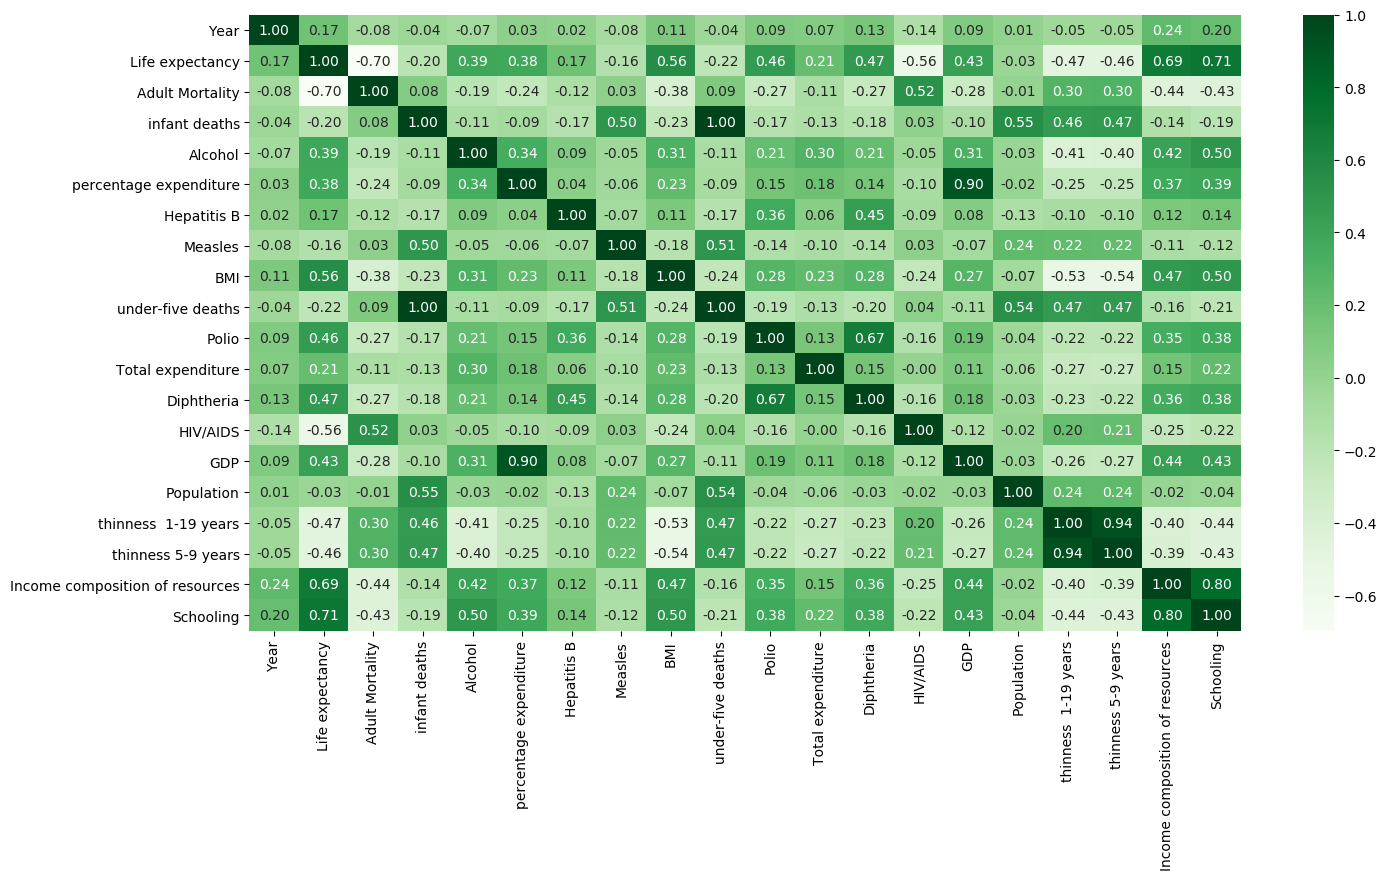

In [17]:
##We can use Heatmap to graphically show the correlation

fig = plt.figure(figsize = (16, 8))
sns.heatmap(correlation_matrix, annot=True, fmt = '.2f', cmap = 'Greens')
plt.show()

Clearly,  some of the predicting factors which has been chosen initially really affect the Life expectancy. Some of the predicting variables that are actually affecting the life expectancy are "Adult Mortality", infant mortality, HIV/Aids, BMI  "Income composition of resources", and "Schooling". Also, there is a correlation of 1 between the columns "under-five deaths" and "infant deaths", so we will drop one of them. This will enable us deal with Multicollinearity.

In [18]:
## who_df.drop('infant deaths', axis = 1, inplace = True)

In [19]:
who_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [20]:
who_df.shape

(2938, 22)

# Let us see how some of the predicting factors affect the life expectancy

In [21]:
who_df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

## Here is a plot of Status vs Life expectancy

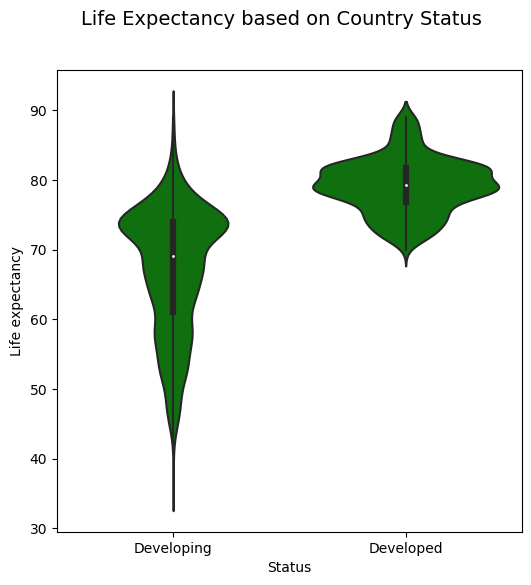

In [53]:
fig = plt.figure(figsize = (6, 6))
sns.violinplot(data = who_df, x = who_df['Status'], y = who_df['Life expectancy'], hue = None, color = 'g')
plt.suptitle('Life Expectancy based on Country Status',  fontsize = 14)
plt.show()



This implies that people in developed countries have high life expectancy when compared to people in developing countries.

## Here is a plot of Income Composition of Resources vs Life Expectancy

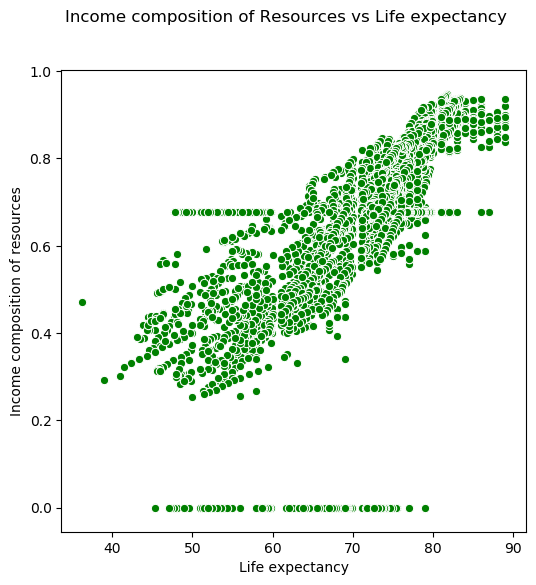

In [67]:
fig = plt.figure(figsize = (6, 6))
sns.scatterplot(data = who_df, x=who_df['Life expectancy'], y = who_df['Income composition of resources'], color='g')
plt.suptitle('Income composition of Resources vs Life expectancy',  fontsize = 12)
plt.show()

Here we can see that the Life expectancy increases as the income composition of resources increases

## Here is a plot of Schooling vs Life Expectancy

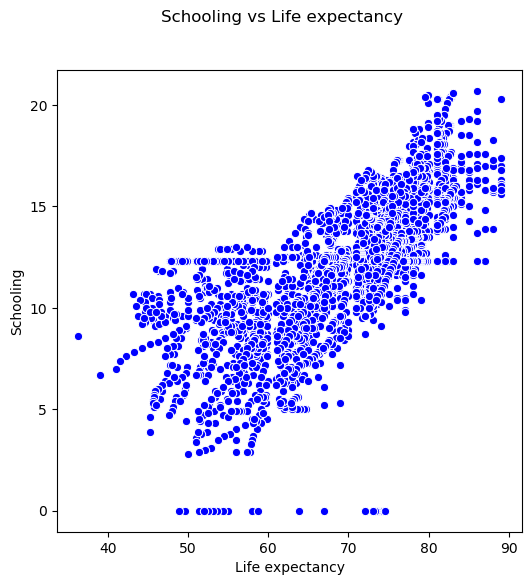

In [71]:
fig = plt.figure(figsize = (6, 6))
sns.scatterplot(data = who_df, x=who_df['Life expectancy'], y = who_df['Schooling'], color='b')
plt.suptitle('Schooling vs Life expectancy',  fontsize = 12)
plt.show()

Here, we can say that Life expectancy increases as the schooling rate increases

## Here is a plot of GDP vs Life expectancy

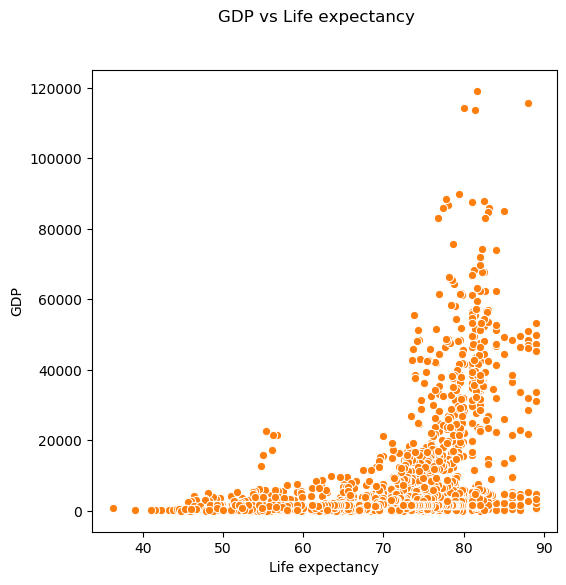

In [74]:
fig = plt.figure(figsize = (6, 6))
sns.scatterplot(data = who_df, x=who_df['Life expectancy'], y = who_df['GDP'], color='C1')
plt.suptitle('GDP vs Life expectancy',  fontsize = 12)
plt.show()

Here, an increase in the GDP of a country corresponds to an increase in their Life expectancy

## Here is a plot of HIV/AIDS vs Life expectancy

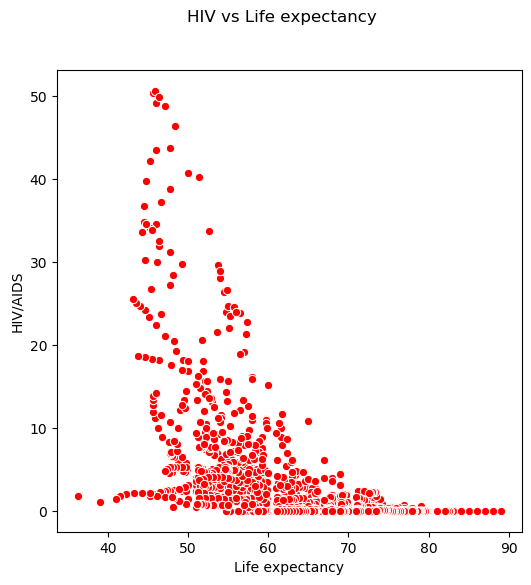

In [76]:
fig = plt.figure(figsize = (6, 6))
sns.scatterplot(data = who_df, x=who_df['Life expectancy'], y = who_df['HIV/AIDS'], color='r')
plt.suptitle('HIV vs Life expectancy',  fontsize = 12)
plt.show()

Here, increase in the prevalnce of HIV/Aids corresponds to a drastic decrease in Life expectancy

## Here is a plot of Percentage Expenditure vs  Life Expectancy

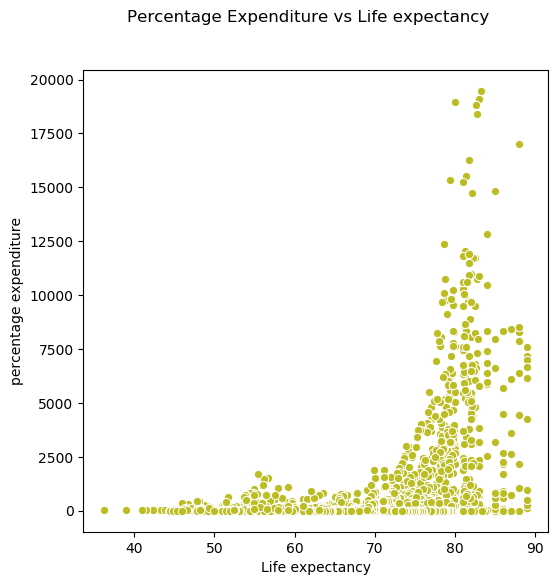

In [80]:
fig = plt.figure(figsize = (6, 6))
sns.scatterplot(data = who_df, x=who_df['Life expectancy'], y = who_df['percentage expenditure'], color='C8')
plt.suptitle('Percentage Expenditure vs Life expectancy',  fontsize = 12)
plt.show()

Clearly, a country having a lower life expectancy value less than 65 can improve its average lifespan by increasing its healthcare expenditure.

## Here is a plot of  Adult Mortality vs Life expectancy

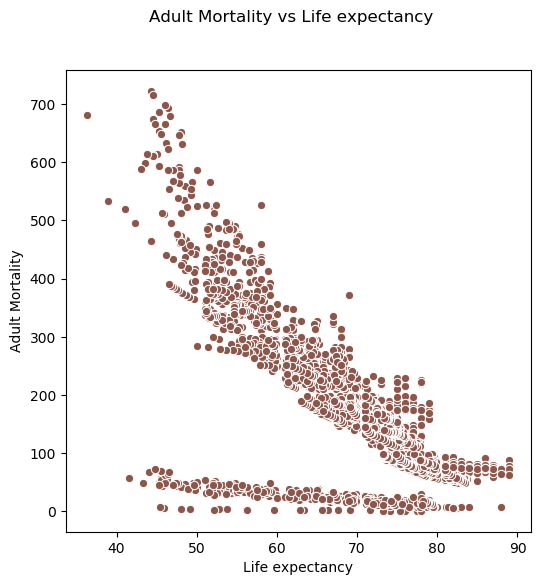

In [91]:
fig = plt.figure(figsize = (6, 6))
sns.scatterplot(data = who_df, x=who_df['Life expectancy'], y = who_df['Adult Mortality'], color='C5')
plt.suptitle('Adult Mortality vs Life expectancy',  fontsize = 12)
plt.show()

Here we observe that an increase in the Adult Mortality rate would greatly reduce the average Life expectancy of a country.

## Here is a plot of Infant Mortality vs Life expectancy

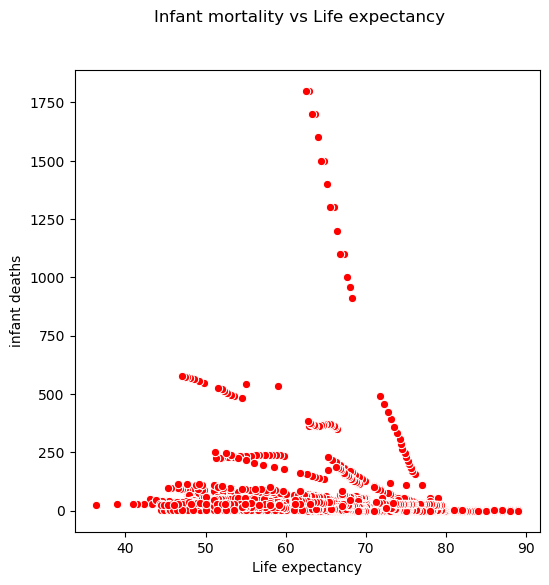

In [93]:
fig = plt.figure(figsize = (6, 6))
sns.scatterplot(data = who_df, x=who_df['Life expectancy'], y = who_df['infant deaths'], color='red')
plt.suptitle('Infant mortality vs Life expectancy',  fontsize = 12)
plt.show()

Here, increase in the Infant mortality rate corresponds to a slight decrease in Life expectancy

## Here is a plot of Alcohol vs Life expectancy

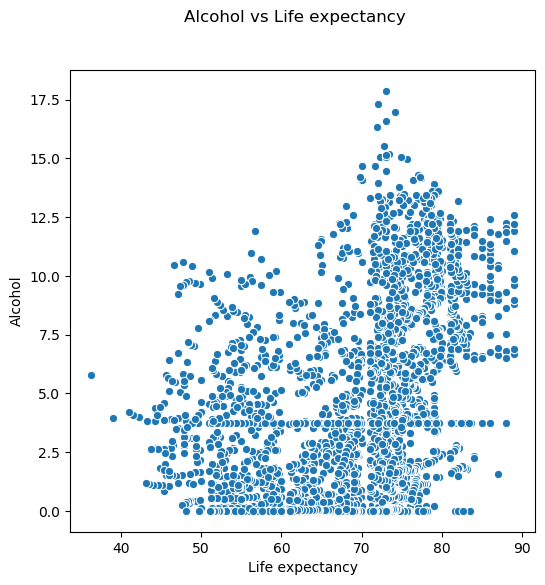

In [97]:
fig = plt.figure(figsize = (6, 6))
sns.scatterplot(data = who_df, x=who_df['Life expectancy'], y = who_df['Alcohol'], color='C0')
plt.suptitle('Alcohol vs Life expectancy',  fontsize = 12)
plt.show()

Here, as the consumption of alcohol increases, there is a slight increase on the life expectancy rate, which is a positive correlation

## Here is a plot of Population vs Life expectancy

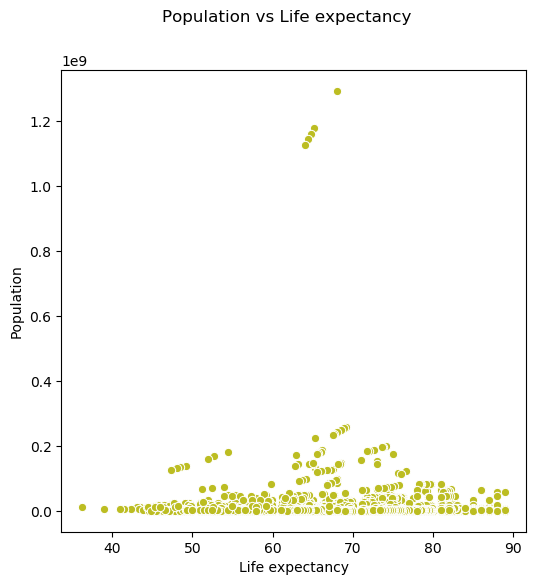

In [98]:
fig = plt.figure(figsize = (6, 6))
sns.scatterplot(data = who_df, x=who_df['Life expectancy'], y = who_df['Population'], color='C18')
plt.suptitle('Population vs Life expectancy',  fontsize = 12)
plt.show()

Here, we can conclude that it is true that densely populated countries tend to have lower life expectancy